In [261]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [262]:
dfJS = pd.read_csv('inq2025.csv')
dfJS.head()

,ID,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,...,premiere,interest,stucar,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
0,1,NaN,N,LAW,BUS,0,14-Sep-23,1,0,0,...,0,0,0,4,0.017183,0.02038,0.037652,NaN,NaN,False
1,2,C,7,NaN,NaN,0,15-Sep-23,1,0,0,...,0,0,1,19,0.017183,0.02038,0.037652,NaN,NaN,False
2,3,NaN,3,NaN,NaN,0,17-Feb-23,2,2,0,...,0,0,0,27,0.017183,0.02038,0.037652,NaN,NaN,False
3,4,C,5,MED,PEDU,0,15-Mar-23,3,2,1,...,0,0,1,34,0.017183,0.02038,0.037652,NaN,NaN,False
4,5,NaN,3,NaN,NaN,0,3-Apr-23,1,1,0,...,0,0,1,45,0.017183,0.02038,0.037652,NaN,NaN,True


In [263]:
dfJS.isnull().sum()/len(dfJS)

ID                     0.000000
ETHNICITY              0.215452
TERRITORY              0.000011
ACADEMIC_INTEREST_1    0.515938
ACADEMIC_INTEREST_2    0.728045
Enroll                 0.000000
CONTACT_DATE           0.000000
TOTAL_CONTACTS         0.000000
SELF_INIT_CNTCTS       0.000000
TRAVEL_INIT_CNTCTS     0.000000
SOLICITED_CNTCTS       0.000000
REFERRAL_CNTCTS        0.000000
CAMPUS_VISIT           0.000000
CONTACT_CODE1          0.001563
LEVEL_YEAR             0.000000
IRSCHOOL               0.167355
satscore               0.704827
sex                    0.041899
mailq                  0.000000
telecq                 0.774797
premiere               0.000000
interest               0.000000
stucar                 0.000000
init_span              0.000000
int1rat                0.000000
int2rat                0.000000
hscrat                 0.000000
avg_income             0.228777
distance               0.212807
Instate                0.000000
dtype: float64

In [264]:
# Dropping columns based on assignement documentation on rejected variables
# Dropping LEVEL_YEAR because all records are freshmen
rejected_columns = [
    "ID",
    "ACADEMIC_INTEREST_1",
    "ACADEMIC_INTEREST_2",
     "IRSCHOOL",         
    "CONTACT_DATE",      
    "CONTACT_CODE1",
    'LEVEL_YEAR', # Same for all  
    'telecq', # missing 77%   
    'satscore' # missing 70%    
]

dfJS = dfJS.drop(columns=rejected_columns)

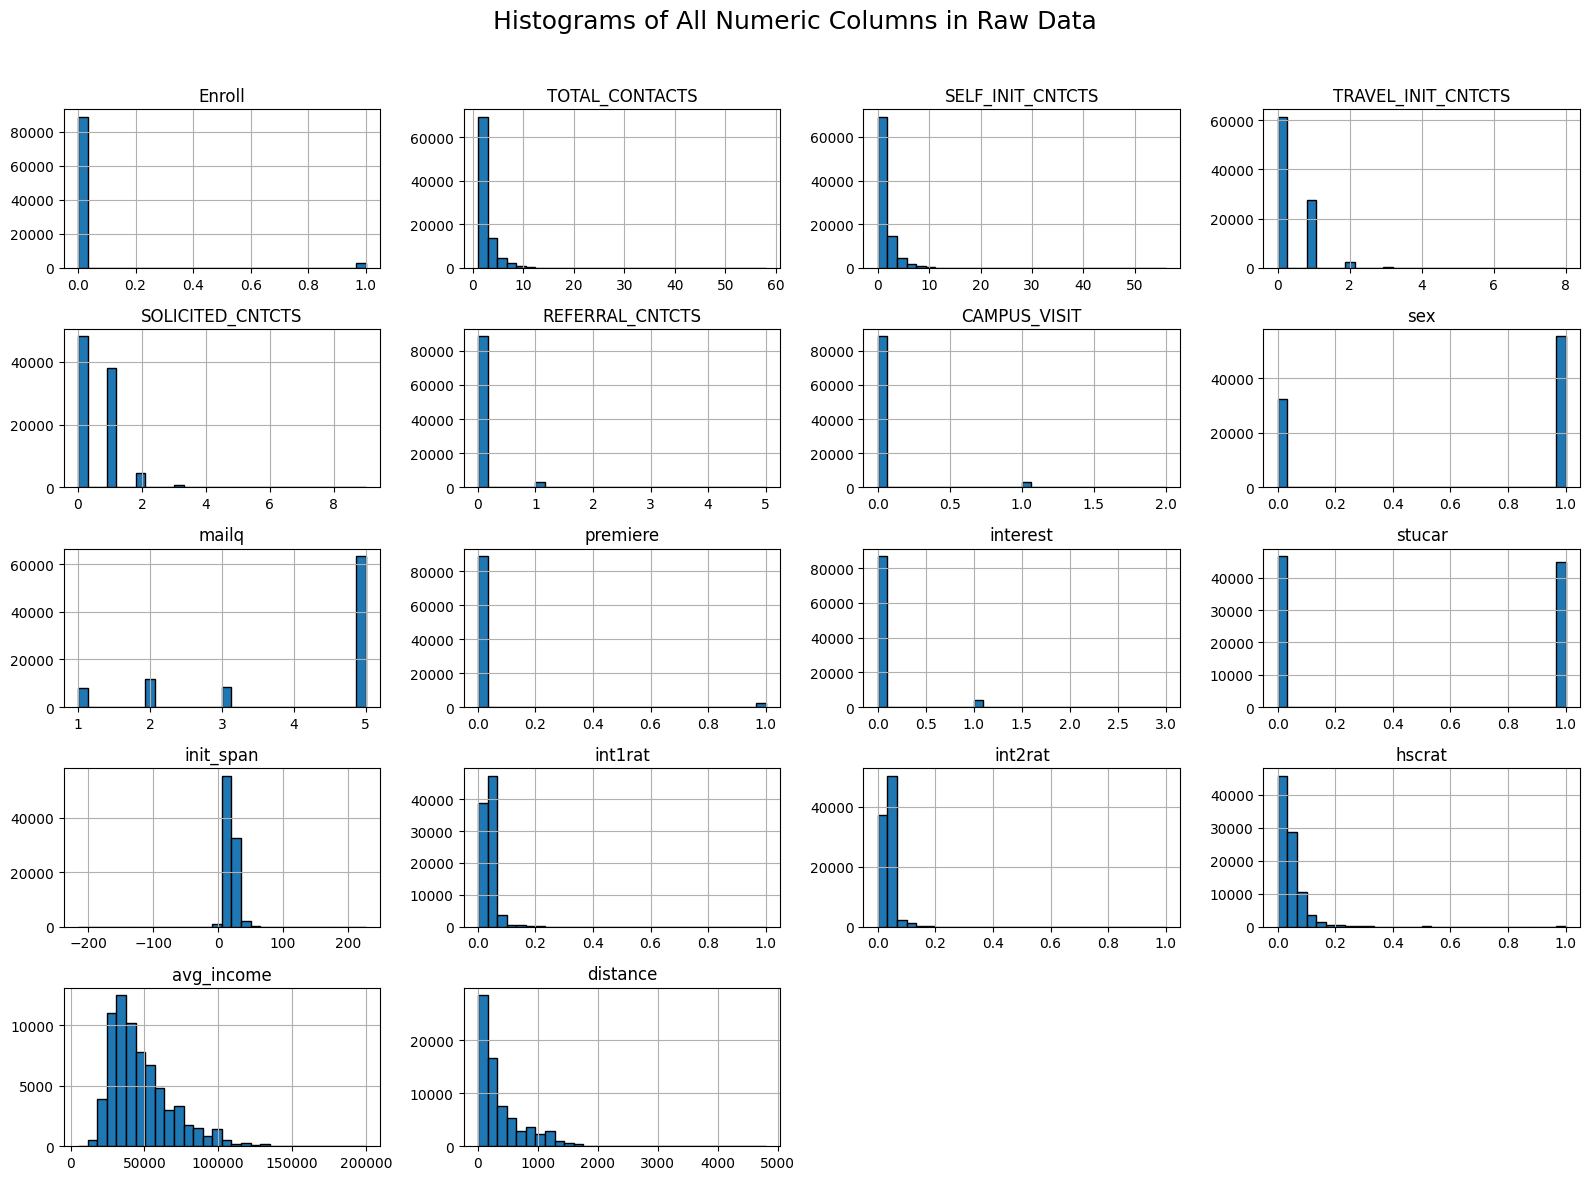

In [265]:
# Plot histograms for all numeric columns in dfJS
dfJS.hist(figsize=(16, 12), bins=30, edgecolor="black")
plt.suptitle("Histograms of All Numeric Columns in Raw Data", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [266]:
dfJS.head()

,ETHNICITY,TERRITORY,Enroll,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,sex,...,premiere,interest,stucar,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
0,NaN,N,0,1,0,0,1,0,0,1.0,...,0,0,0,4,0.017183,0.02038,0.037652,NaN,NaN,False
1,C,7,0,1,0,0,1,0,0,0.0,...,0,0,1,19,0.017183,0.02038,0.037652,NaN,NaN,False
2,NaN,3,0,2,2,0,0,0,0,0.0,...,0,0,0,27,0.017183,0.02038,0.037652,NaN,NaN,False
3,C,5,0,3,2,1,0,0,0,1.0,...,0,0,1,34,0.017183,0.02038,0.037652,NaN,NaN,False
4,NaN,3,0,1,1,0,0,0,0,0.0,...,0,0,1,45,0.017183,0.02038,0.037652,NaN,NaN,True


In [267]:
print(dfJS.describe(include='all'))

       ETHNICITY TERRITORY        Enroll  TOTAL_CONTACTS  SELF_INIT_CNTCTS  \
count      71772     91481  91482.000000    91482.000000      91482.000000   
unique         7        11           NaN             NaN               NaN   
top            C         2           NaN             NaN               NaN   
freq       31750     14621           NaN             NaN               NaN   
mean         NaN       NaN      0.031350        2.166098          1.214119   
std          NaN       NaN      0.174264        1.852537          1.666529   
min          NaN       NaN      0.000000        1.000000          0.000000   
25%          NaN       NaN      0.000000        1.000000          0.000000   
50%          NaN       NaN      0.000000        2.000000          1.000000   
75%          NaN       NaN      0.000000        2.000000          1.000000   
max          NaN       NaN      1.000000       58.000000         56.000000   

        TRAVEL_INIT_CNTCTS  SOLICITED_CNTCTS  REFERRAL_CNTCTS  

In [268]:
dfJS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ETHNICITY           71772 non-null  object 
 1   TERRITORY           91481 non-null  object 
 2   Enroll              91482 non-null  int64  
 3   TOTAL_CONTACTS      91482 non-null  int64  
 4   SELF_INIT_CNTCTS    91482 non-null  int64  
 5   TRAVEL_INIT_CNTCTS  91482 non-null  int64  
 6   SOLICITED_CNTCTS    91482 non-null  int64  
 7   REFERRAL_CNTCTS     91482 non-null  int64  
 8   CAMPUS_VISIT        91482 non-null  int64  
 9   sex                 87649 non-null  float64
 10  mailq               91482 non-null  int64  
 11  premiere            91482 non-null  int64  
 12  interest            91482 non-null  int64  
 13  stucar              91482 non-null  int64  
 14  init_span           91482 non-null  int64  
 15  int1rat             91482 non-null  float64
 16  int2

In [269]:
dfJS.isnull().sum()/len(dfJS)

ETHNICITY             0.215452
TERRITORY             0.000011
Enroll                0.000000
TOTAL_CONTACTS        0.000000
SELF_INIT_CNTCTS      0.000000
TRAVEL_INIT_CNTCTS    0.000000
SOLICITED_CNTCTS      0.000000
REFERRAL_CNTCTS       0.000000
CAMPUS_VISIT          0.000000
sex                   0.041899
mailq                 0.000000
premiere              0.000000
interest              0.000000
stucar                0.000000
init_span             0.000000
int1rat               0.000000
int2rat               0.000000
hscrat                0.000000
avg_income            0.228777
distance              0.212807
Instate               0.000000
dtype: float64

In [270]:
# Replace Nan values for Avg income since it is a key predictor and only 22% missing
# Calculate mean and median for avg_income
mean_income = dfJS["avg_income"].mean(skipna=True)
median_income = dfJS["avg_income"].median(skipna=True)
print("Mean income:",mean_income)
print("Median income:",median_income)

Mean income: 47315.33414596119
Median income: 42324.0


In [271]:
# Using Median income since mean is higher
dfJS["avg_income"] = dfJS['avg_income'].fillna(median_income)

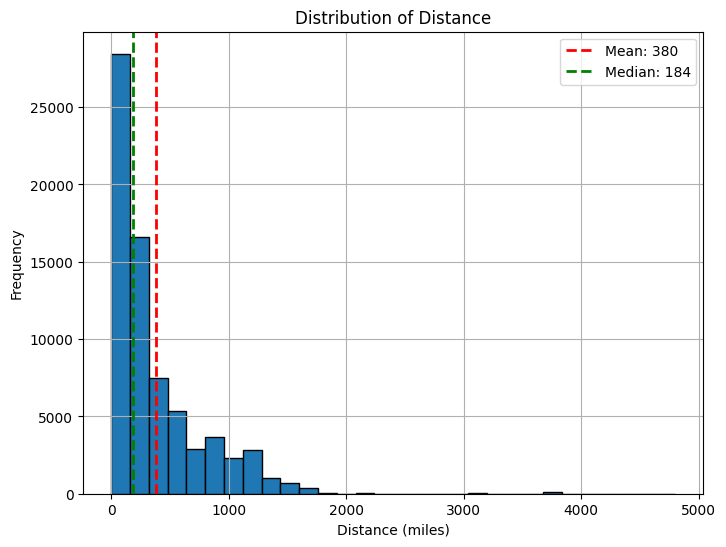

In [272]:
plt.figure(figsize=(8,6))
dfJS["distance"].hist(bins=30, edgecolor="black")
plt.title("Distribution of Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.axvline(dfJS["distance"].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {dfJS['distance'].mean():.0f}")
plt.axvline(dfJS["distance"].median(), color='green', linestyle='dashed', linewidth=2, label=f"Median: {dfJS['distance'].median():.0f}")
plt.legend()
plt.show()

In [273]:
# Log the distance because it reduces the influence of extreme outliers (students living +1000 miles away)

median_distance = dfJS['distance'].median(skipna=True)
dfJS['distance'] = dfJS['distance'].fillna(median_distance)

# Creating log transformation
dfJS['distance_log'] = np.log1p(dfJS['distance'])

In [274]:
dfJS.isnull().sum()/len(dfJS)

ETHNICITY             0.215452
TERRITORY             0.000011
Enroll                0.000000
TOTAL_CONTACTS        0.000000
SELF_INIT_CNTCTS      0.000000
TRAVEL_INIT_CNTCTS    0.000000
SOLICITED_CNTCTS      0.000000
REFERRAL_CNTCTS       0.000000
CAMPUS_VISIT          0.000000
sex                   0.041899
mailq                 0.000000
premiere              0.000000
interest              0.000000
stucar                0.000000
init_span             0.000000
int1rat               0.000000
int2rat               0.000000
hscrat                0.000000
avg_income            0.000000
distance              0.000000
Instate               0.000000
distance_log          0.000000
dtype: float64

In [275]:
column_names = list(dfJS.columns)
x = dfJS[column_names]
print(x)

      ETHNICITY TERRITORY  Enroll  TOTAL_CONTACTS  SELF_INIT_CNTCTS  \
0           NaN         N       0               1                 0   
1             C         7       0               1                 0   
2           NaN         3       0               2                 2   
3             C         5       0               3                 2   
4           NaN         3       0               1                 1   
...         ...       ...     ...             ...               ...   
91477       NaN         5       0               2                 1   
91478         C         6       0               3                 2   
91479         C         6       0               1                 0   
91480         C         0       0               2                 1   
91481         H         4       0               2                 1   

       TRAVEL_INIT_CNTCTS  SOLICITED_CNTCTS  REFERRAL_CNTCTS  CAMPUS_VISIT  \
0                       0                 1                0         

In [276]:
categorical_vars = ["ETHNICITY", "TERRITORY", "sex"]
dfJS['ETHNICITY'] = dfJS['ETHNICITY'].fillna("Unknown")

dfJS_model = pd.get_dummies(dfJS, columns=categorical_vars,drop_first=True)

dfJS_model["Instate"] = dfJS_model["Instate"].astype(int)

dfJS_model.head()

,Enroll,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,mailq,premiere,interest,...,TERRITORY_2,TERRITORY_3,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,sex_1.0
0,0,1,0,0,1,0,0,5,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,1,0,0,1,0,0,5,0,0,...,False,False,False,False,False,True,False,False,False,False
2,0,2,2,0,0,0,0,5,0,0,...,False,True,False,False,False,False,False,False,False,False
3,0,3,2,1,0,0,0,5,0,0,...,False,False,False,True,False,False,False,False,False,True
4,0,1,1,0,0,0,0,5,0,0,...,False,True,False,False,False,False,False,False,False,False


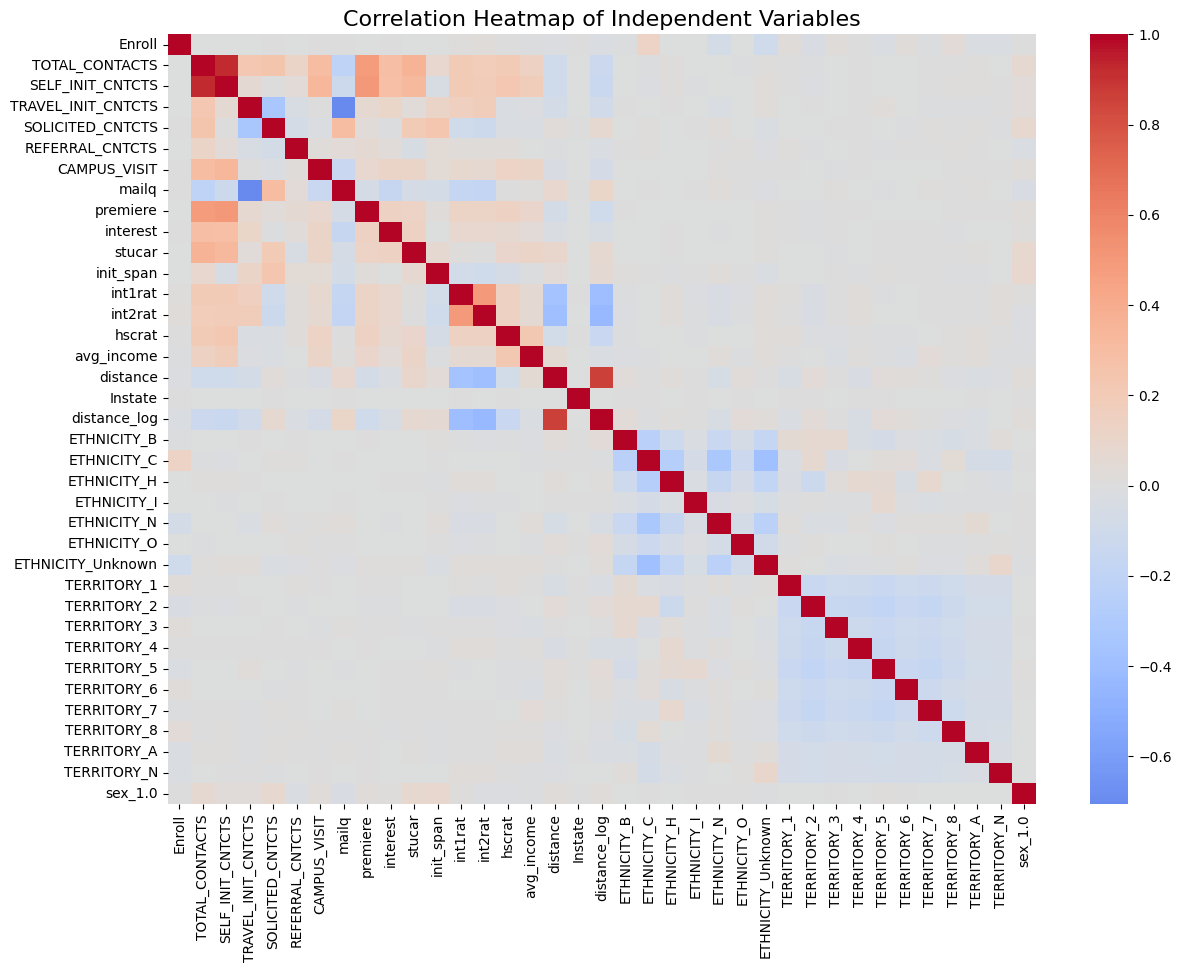

In [277]:
# Heat map Correlaltion check on predictor variables

corr_matrixJS = dfJS_model.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrixJS, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap of Independent Variables", fontsize=16)
plt.show()


In [278]:
# Variance Inflation Factor (VIF) Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

XJS = dfJS_model.drop(columns=["Enroll"])
XJS = XJS.select_dtypes(include=[np.number]).replace([np.inf, -np.inf], np.nan)
XJS = XJS.fillna(XJS.mean())
XJS_const = add_constant(XJS)

vif_dataJS = pd.DataFrame()
vif_dataJS["Variable"] = XJS_const.columns
vif_dataJS["VIF"] = [variance_inflation_factor(XJS_const.values, i) for i in range(XJS_const.shape[1])]
print(vif_dataJS.sort_values(by="VIF", ascending=False))

              Variable           VIF
1       TOTAL_CONTACTS  78499.337385
2     SELF_INIT_CNTCTS  63530.228091
4     SOLICITED_CNTCTS   9648.698607
3   TRAVEL_INIT_CNTCTS   7099.941201
5      REFERRAL_CNTCTS   1171.228662
0                const    175.347018
18        distance_log      4.106324
16            distance      3.930023
7                mailq      2.135390
13             int2rat      1.503120
12             int1rat      1.449270
8             premiere      1.379342
10              stucar      1.209497
6         CAMPUS_VISIT      1.197972
11           init_span      1.146511
14              hscrat      1.128176
9             interest      1.110994
15          avg_income      1.098434
17             Instate      1.000164


In [279]:
# Make sure the target is numeric
dfJS_model["Enroll"] = dfJS_model["Enroll"].astype(int)

# Convert Instate to numeric (0/1)
dfJS_model["Instate"] = dfJS_model["Instate"].astype(int)

# Force all columns to numeric
dfJS_model = dfJS_model.apply(pd.to_numeric, errors="coerce")

# Check again
print(dfJS_model.dtypes.value_counts())

bool       18
int64      13
float64     6
Name: count, dtype: int64


In [280]:
# Convert boolean columns to int (0/1)
for col in dfJS_model.select_dtypes(include=["bool"]).columns:
    dfJS_model[col] = dfJS_model[col].astype(int)

# Double check after conversion
print(dfJS_model.dtypes.value_counts())

int64      31
float64     6
Name: count, dtype: int64


In [281]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Ensure everything is numeric
dfJS_model = dfJS_model.apply(pd.to_numeric, errors="coerce")


# Split data

yJS = dfJS_model["Enroll"]
XJS = dfJS_model.drop(columns=["Enroll", "TOTAL_CONTACTS", "distance"])  

XJS_train, XJS_test, yJS_train, yJS_test = train_test_split(
    XJS, yJS, test_size=0.3, random_state=0, stratify=yJS
)

# Reduce predictors

important_varsJS = [
    "distance_log", "SELF_INIT_CNTCTS", "TRAVEL_INIT_CNTCTS",
    "SOLICITED_CNTCTS", "REFERRAL_CNTCTS", "CAMPUS_VISIT",
    "avg_income", "Instate"
] + [col for col in XJS_train.columns if col.startswith("ETHNICITY_")]

XJS_train_reduced = sm.add_constant(XJS_train[important_varsJS])
XJS_test_reduced = sm.add_constant(XJS_test[important_varsJS])

regressionJS = sm.Logit(yJS_train, XJS_train_reduced).fit(maxiter=200)
print(regressionJS.summary())

# Evaluate on test set

yJS_pred_prob = regressionJS.predict(XJS_test_reduced)
yJS_pred = (yJS_pred_prob >= 0.2).astype(int)

Optimization terminated successfully.
         Current function value: 0.124989
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 Enroll   No. Observations:                64037
Model:                          Logit   Df Residuals:                    64021
Method:                           MLE   Df Model:                           15
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                  0.1036
Time:                        21:40:23   Log-Likelihood:                -8003.9
converged:                       True   LL-Null:                       -8928.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9657      0.174    -11.267      0.000      -2.308      -1.624
dist

In [282]:
print("\nAccuracy:", accuracy_score(yJS_test, yJS_pred))
print("AUC:", roc_auc_score(yJS_test, yJS_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(yJS_test, yJS_pred))


Accuracy: 0.968664601931135
AUC: 0.753609615493962
Confusion Matrix:
 [[26585     0]
 [  860     0]]


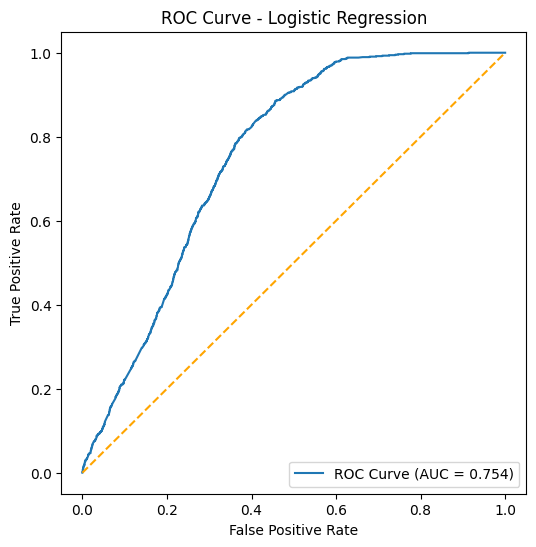

In [283]:
from sklearn.metrics import roc_curve, auc

fprJS, tprJS, _ = roc_curve(yJS_test, yJS_pred_prob)
roc_aucJS = auc(fprJS, tprJS)

plt.figure(figsize=(6,6))
plt.plot(fprJS, tprJS, label=f"ROC Curve (AUC = {roc_aucJS:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [284]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

treeJS = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    class_weight="balanced",
    random_state=0
)

treeJS.fit(XJS_train, yJS_train)

yJS_tree_pred = treeJS.predict(XJS_test)
yJS_tree_pred_prob = treeJS.predict_proba(XJS_test)[:, 1]

In [285]:
print("Accuracy:", accuracy_score(yJS_test, yJS_tree_pred))
print("AUC:", roc_auc_score(yJS_test, yJS_tree_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(yJS_test, yJS_tree_pred))

Accuracy: 0.4053926033885954
AUC: 0.7394464661397624
Confusion Matrix:
 [[10279 16306]
 [   13   847]]


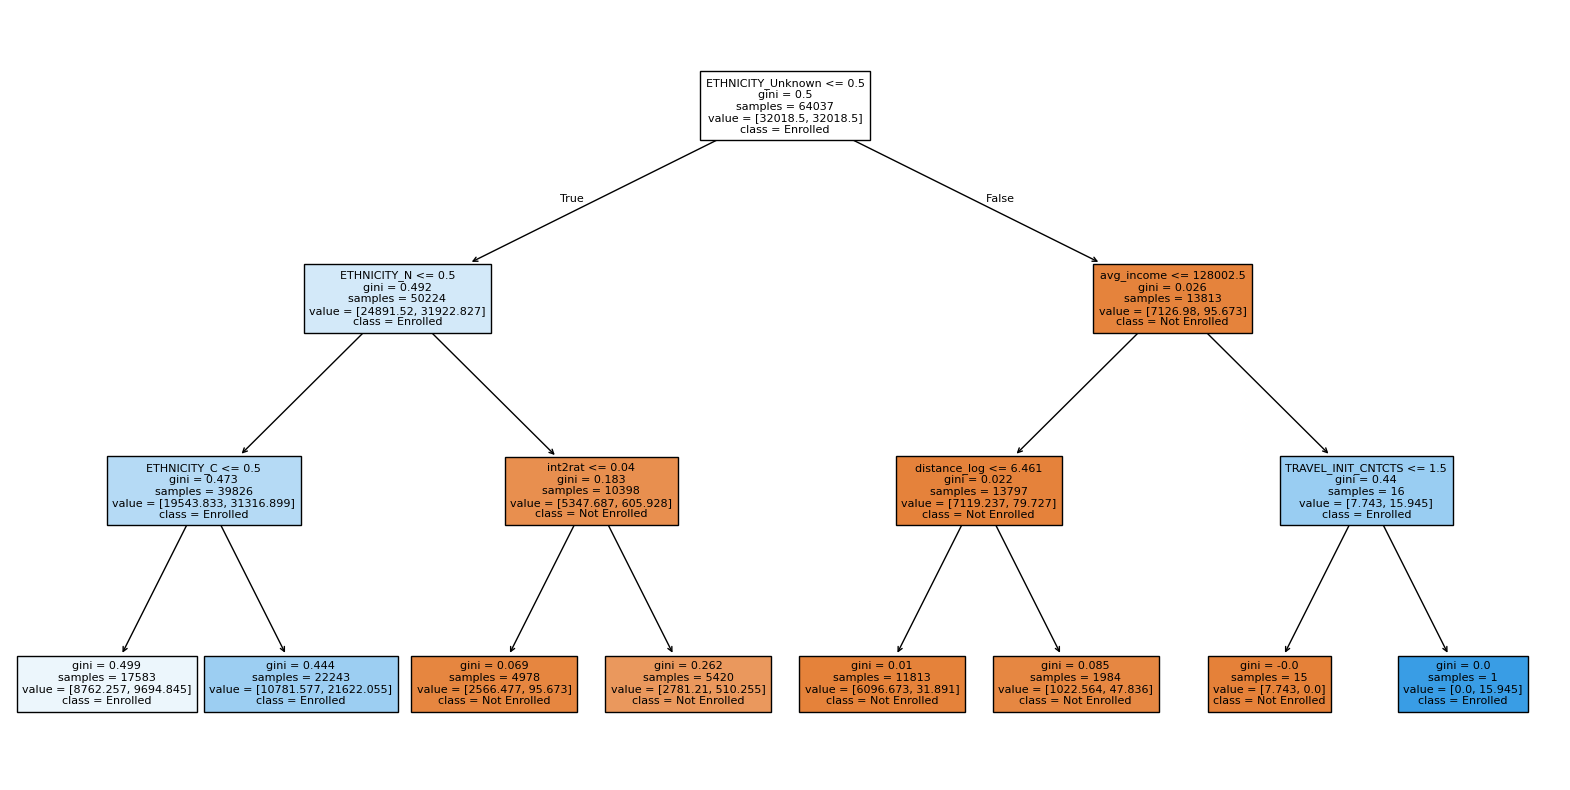

In [286]:
plt.figure(figsize=(20,10))
plot_tree(treeJS, feature_names=XJS.columns, class_names=["Not Enrolled", "Enrolled"], filled=True, fontsize=8)
plt.show()

In [287]:
# Count enrollments vs non-enrollments
enroll_countsJS = dfJS_model["Enroll"].value_counts()
print(enroll_countsJS)
print("\nPercentage breakdown:")
print(enroll_countsJS / len(dfJS_model) * 100)

Enroll
0    88614
1     2868
Name: count, dtype: int64

Percentage breakdown:
Enroll
0    96.864957
1     3.135043
Name: count, dtype: float64
